<a href="https://colab.research.google.com/github/sandeeptuluri/fresh1/blob/main/Text2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/fresh1/main/dataset2.csv')
df.head()

,id,summary,topicID,topicName
0,26899,Uttarakhand has been battered by rains since S...,20,Local News
1,26897,Gunmen from a suspected criminal gang attacked...,11,Africa
2,26896,A street artist Mundano painted a giant mural ...,6,Habitat
3,26896,A street artist Mundano painted a giant mural ...,11,Africa
4,26896,A street artist Mundano painted a giant mural ...,16,Art and Culture


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   summary    100 non-null    object
 2   topicID    100 non-null    int64 
 3   topicName  100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [14]:
df.isnull().sum()

id           0
summary      0
topicID      0
topicName    0
dtype: int64

In [15]:
df.topicName.nunique()

22

In [16]:
df['summary'] = df['summary'].apply(lambda summary: (summary).lower())

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df['summary']
y = df['topicID']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
y_train.shape

(70,)

In [21]:
from tensorflow.keras.utils import to_categorical

In [27]:
ytr = to_categorical(y_train)

In [28]:
ytr.shape

(70, 34)

In [29]:
yte = to_categorical(y_test)

In [30]:
yte.shape

(30, 34)

In [31]:
import tensorflow as tf

In [32]:
import tensorflow_hub as hub

In [33]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
#hub_layer(train)

Building the Model...

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
model.add(hub_layer)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(34, activation='softmax'))

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(X_train,ytr,epochs=50,validation_data=(X_test,yte),verbose=1)

Epoch 1/50
3/3 [==============================] - 2s 587ms/step - loss: 1.5160 - accuracy: 0.4857 - val_loss: 4.6278 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 2s 604ms/step - loss: 1.5315 - accuracy: 0.4857 - val_loss: 4.8808 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 2s 562ms/step - loss: 1.4048 - accuracy: 0.4571 - val_loss: 5.3669 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 2s 562ms/step - loss: 1.4185 - accuracy: 0.5000 - val_loss: 5.5947 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 2s 558ms/step - loss: 1.4036 - accuracy: 0.5143 - val_loss: 5.6788 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 2s 556ms/step - loss: 1.3269 - accuracy: 0.5571 - val_loss: 5.7267 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 2s 570ms/step - loss: 1.3279 - accuracy: 0.5286 - val_loss: 5.9721 - val_accuracy: 0.0

In [75]:
metrics = pd.DataFrame(model.history.history)

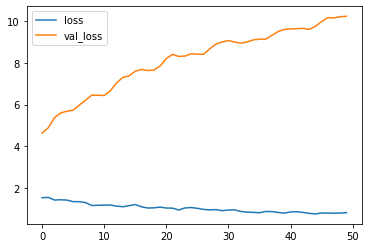

In [76]:
metrics[['loss','val_loss']].plot()

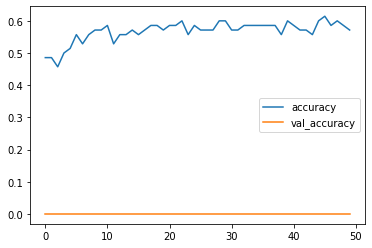

In [77]:
metrics[['accuracy','val_accuracy']].plot()

evaluating the model.....

In [78]:
model.evaluate(X_test,yte,verbose=0)

[10.24894905090332, 0.0]

Predicting the model....

In [79]:
predictions = model.predict(X_test)

In [80]:
a = X_test[:1]

In [81]:
a

16    a sword believed to have belonged to a crusader who sailed to the holy land almost a millennium ago has been recovered from the mediterranean seabed. \nthe location suggests it had served as a shelter for seafarers. \nthe metre-long relic, encrusted with marine organisms, will be put on display after it has been cleaned and restored.
Name: summary, dtype: object

In [82]:
h = model.predict(a)

In [83]:
np.argmax(h)

8

In [84]:
group = df.groupby(['topicName','topicID'])

In [85]:
group.first()

,,id,summary
topicName,topicID,,
Africa,11,26897,"gunmen from a suspected criminal gang attacked a village market in northwest nigeria's sokoto state, killing 43 people.\nsince last month, nigerian troops have been conducting air and ground operations against bandit camps in zamfara state.\nsokoto officials are worried that bandits are relocating to the state as a result of zamfara operations."
Art and Culture,16,26896,"a street artist mundano painted a giant mural in sao paolo using the ashes he collected from the burned rainforest, in order to raise awareness about climate change.\nthe giant 1,000-square-meter mural, titled ""the forest firefighter,"" features a heroic character helplessly facing a raging fire.\nmundano used 200kgs of ashes to create the mural."
Asia,9,26881,north korea fired a ballistic missile into the sea in a continuation of its recent weapons tests.\nthe launch came hours after the u.s. reaffirmed its offer to resume diplomacy on the north’s nuclear weapons program.\nthe south korean and japanese militaries didn’t immediately say what kind of ballistic missile the north fired.
Business,5,26885,"the exchange-traded fund will begin trading on tuesday on the nyse under the ""bito"" ticker symbol. \nbito can be bought and sold like a stock and doesn't require investors to hold an account at a cryptocurrency exchange or to have a crypto wallet. \nthe arrival of the etf comes as bitcoin has shattered the $1 trillion market capitalization threshold."
Crypto Currency,32,26888,"the attackers post convincing fake profiles on legitimate dating sites. \nonce they've made contact with a target, the attackers suggest continuing the conversation on a messaging platform and then, try to persuade the target to invest in a fake crypto trading app. \nin addition to stealing money, the attackers can also gain access to victims' iphones."
Europe,8,26890,"a sword believed to have belonged to a crusader who sailed to the holy land almost a millennium ago has been recovered from the mediterranean seabed. \nthe location suggests it had served as a shelter for seafarers. \nthe metre-long relic, encrusted with marine organisms, will be put on display after it has been cleaned and restored."
Gender Equality,15,26892,"astronauts began saturday their 6-month mission on china's first permanent space station.\nthe new crew includes 2 veterans of space travel, zhai zhigang and wang yaping, and ye guangfu, who is making his first trip to space.\nwang is the first chinese woman to board the tiangong space station and is expected to become china's first female spacewalker."
Global health,7,26884,"south african said it will not approve russia's sputnik v vaccine because of concerns it could increase the risk of hiv infection among men.\nthe decision was based on earlier studies testing the safety of a modified form of adenovirus in the russian jab.\nwho has not approved sputnik v for emergency use, although it is used in some countries."
Habitat,6,26896,"a street artist mundano painted a giant mural in sao paolo using the ashes he collected from the burned rainforest, in order to raise awareness about climate change.\nthe giant 1,000-square-meter mural, titled ""the forest firefighter,"" features a heroic character helplessly facing a raging fire.\nmundano used 200kgs of ashes to create the mural."


Saving the model....

In [86]:
!mkdir -p saved_model
model.save('saved_model/text_classification2')

INFO:tensorflow:Assets written to: saved_model/text_classification2/assets


INFO:tensorflow:Assets written to: saved_model/text_classification2/assets


Importing the saved model

In [87]:
import tensorflow as tf

In [88]:
hash = tf.keras.models.load_model('saved_model/text_classification2')

In [89]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [90]:
k = X_test[9:10]

In [91]:
print(k)

41    sri lanka backed down from ambitious plans to become the world's first completely organic farming nation, reversing a ban on imports of chemical fertiliser.\nas the quality of tea produced in factories dropped, the govt decided to import sulphate of ammonia.\nimports of chemical fertiliser would continue until they produce enough organic fertiliser.
Name: summary, dtype: object


In [92]:
m = hash.predict(k)

In [93]:
np.argmax(m)

9

In [94]:
l=["Ahead of his bail hearing today, the Narcotics Control Bureau (NCB) has submitted a chat between Aryan Khan and an actress in which they discussed drugs. A Mumbai court had reserved order for October 20 on bail applications of Aryan and his co-accused in the Mumbai cruise drugs case"]

In [95]:
u = hash.predict(l)

In [96]:
np.argmax(u)

26